# Data Exploration Project - Divorce Prediction

Felix Hartmann 1800156

Dieses Datenexplorationsprojekt widmet sich der eingehenden Analyse eines Datensatzes, der Informationen über 170 Paare sowie deren entsprechende Divorce Predictors Scale-Variablen (DPS) auf der Grundlage der Gottman-Paartherapie enthält. Die Datensätze wurden durch persönliche Interviews von Paaren erfasst, die entweder bereits geschieden (divorce = 0) sind oder sich in einer glücklichen Ehe befinden (divorce = 1). Alle Antworten wurden auf einer 5-Punkte-Skala erfasst (0=Nie, 1=Selten, 2=Durchschnittlich, 3=Häufig, 4=Immer). Dieser Datensatz umfasst insgesamt 54 Fragen, die verschiedene Aspekte der Beziehung zwischen den Paaren erfassen.

Als Beispiel für die Fragen in diesem Datensatz können die ersten beiden Fragen betrachtet werden:

"Wenn einer von uns sich entschuldigt, wenn unsere Diskussion sich verschlechtert, endet die Diskussion."
"Ich weiß, dass wir unsere Unterschiede ignorieren können, auch wenn es manchmal schwierig wird."

Das Hauptziel dieses Projekts besteht darin, durch die Analyse dieser Daten einen tieferen Einblick in die Dynamik von Beziehungen zu gewinnen. Dabei soll nicht nur darauf geachtet werden, Auffälligkeiten oder Muster zu erkennen, sondern auch zu bewerten, welche Fragen besonders aussagekräftig sind und welche weniger relevant erscheinen. Zusätzlich ist es das Ziel, potenzielle Vorhersagemodelle für Trennungen zu entwickeln, die auf den gesammelten Daten basieren.

In [226]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelBinarizer
from sklearn.dummy import DummyClassifier
import pandas as pd
import seaborn as sns
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import tree
import matplotlib.pyplot as plt





In [227]:

# Load the data
file_path = "data/divorce_data.csv"
df = pd.read_csv(file_path , delimiter=";")


Die Datenqualität erscheint gut, da der Datensatz vollständig ist und keine fehlenden Werte in den 55 Spalten vorhanden sind. Alle Spalten enthalten numerische Werte auf einer klaren 5-Punkte-Skala, was die Analyse erleichtert. Insgesamt bietet der Datensatz eine solide Grundlage für die Analyse und Modellentwicklung zur Beziehungsdynamik und Vorhersage von Trennungen

In [228]:
# Inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [229]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


# Aufteilung der Daten in getrennt und glücklich verheiratet

Die Daten sind etwa zur Hälfte zwischen getrennten und glücklich verheirateten Paaren getrennt. Dies ist hilfreich, da es das  Risiko von Verzerrungen in den Analysen und Modellierungen reduziert. In diesem Fall kann also auf Resampling-Methoden und gewichtete Metriken verzichtet werden. 

# Metriken 

Kontext wie der Paartherapie, in dem die Divorce Prediction verwendet werden könnte, ist es entscheidend, sowohl Präzision als auch Rückruf angemessen zu berücksichtigen.

Präzision ist wichtig, weil fälschlicherweise ein Problem in der Ehe vorherzusagen, potenziell zu unnötiger Angst oder Spannung zwischen den Partnern führen kann. Wenn das Modell fälschlicherweise eine Trennung vorhersagt, wenn in Wirklichkeit keine droht, könnten die Partner unnötig besorgt sein oder sogar einen Konflikt auslösen.

Rückruf ist ebenso wichtig, da es entscheidend ist, kein Problem in der Ehe zu übersehen, das tatsächlich vorhanden ist. Wenn das Modell es versäumt, eine potenzielle Trennung vorherzusagen, könnte dies bedeuten, dass das Paar nicht die notwendige Unterstützung erhält, um ihre Beziehung zu verbessern oder zu erhalten. Dies könnte letztendlich zu einer unerwarteten Trennung führen, die vermieden hätte werden können, wenn das Problem rechtzeitig erkannt worden wäre.

Deshalb ist es in einem solchen Kontext wichtig, einen Ausgleich zwischen Präzision und Rückruf zu finden, um sicherzustellen, dass das Modell sowohl keine falschen Alarme auslöst als auch keine wirklichen Probleme in der Beziehung übersieht. Der F1-Score, der das Gleichgewicht zwischen Präzision und Rückruf herstellt, kann daher eine geeignete Metrik sein, um die Leistung des Modells angemessen zu bewerten.

Da die Daten etwa zur Hälfte in getrennt und glücklich verheiratet sind, gibt auch die Genauigkeit ein gutes Maß für die Leistung eines Classifiers an. 

In [230]:
# Verteilung von Geschieden zu nicht geschieden 
df['Divorce'].value_counts()


Divorce
0    86
1    84
Name: count, dtype: int64

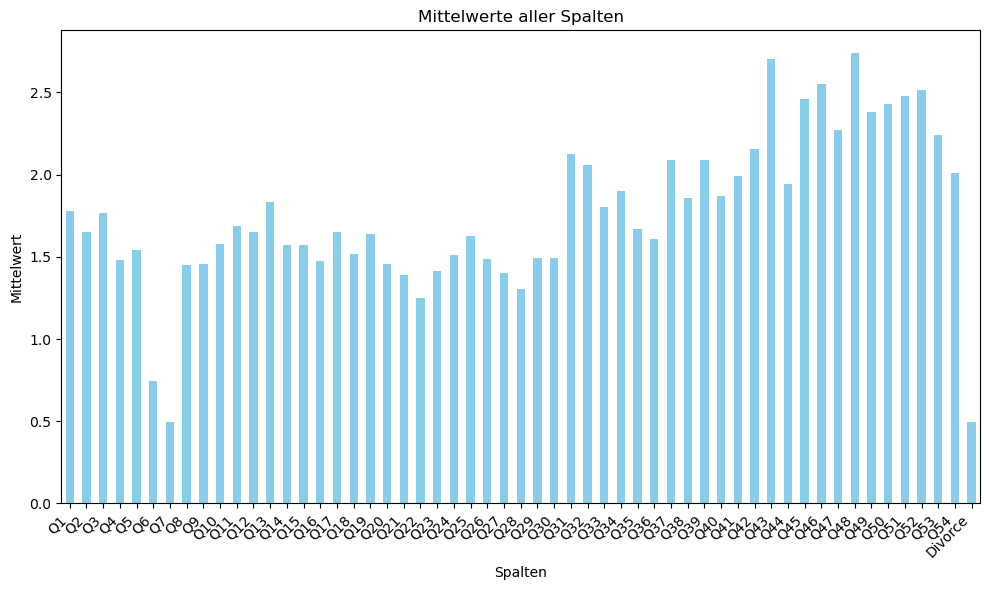

In [231]:
# Mittelwerte aller Spalten:

# Mittelwerte aller Spalten berechnen
mittelwerte = df.mean()

# Barchart erstellen
plt.figure(figsize=(10, 6))
mittelwerte.plot(kind='bar', color='skyblue')
plt.title('Mittelwerte aller Spalten')
plt.xlabel('Spalten')
plt.ylabel('Mittelwert')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [232]:
print(mittelwerte)

Q1         1.776471
Q2         1.652941
Q3         1.764706
Q4         1.482353
Q5         1.541176
Q6         0.747059
Q7         0.494118
Q8         1.452941
Q9         1.458824
Q10        1.576471
Q11        1.688235
Q12        1.652941
Q13        1.835294
Q14        1.570588
Q15        1.570588
Q16        1.476471
Q17        1.652941
Q18        1.517647
Q19        1.641176
Q20        1.458824
Q21        1.388235
Q22        1.247059
Q23        1.411765
Q24        1.511765
Q25        1.629412
Q26        1.488235
Q27        1.400000
Q28        1.305882
Q29        1.494118
Q30        1.494118
Q31        2.123529
Q32        2.058824
Q33        1.805882
Q34        1.900000
Q35        1.670588
Q36        1.605882
Q37        2.088235
Q38        1.858824
Q39        2.088235
Q40        1.870588
Q41        1.994118
Q42        2.158824
Q43        2.705882
Q44        1.941176
Q45        2.458824
Q46        2.552941
Q47        2.270588
Q48        2.741176
Q49        2.382353
Q50        2.429412


In [233]:
print(df.head)

<bound method NDFrame.head of      Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q46  Q47  Q48  Q49  Q50  \
0     2   2   4   1   0   0   0   0   0    0  ...    2    1    3    3    3   
1     4   4   4   4   4   0   0   4   4    4  ...    2    2    3    4    4   
2     2   2   2   2   1   3   2   1   1    2  ...    3    2    3    1    1   
3     3   2   3   2   3   3   3   3   3    3  ...    2    2    3    3    3   
4     2   2   1   1   1   1   0   0   0    0  ...    2    1    2    3    2   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
165   0   0   0   0   0   0   0   0   0    0  ...    1    0    4    1    1   
166   0   0   0   0   0   0   0   0   0    0  ...    4    1    2    2    2   
167   1   1   0   0   0   0   0   0   0    1  ...    3    0    2    0    1   
168   0   0   0   0   0   0   0   0   0    0  ...    3    3    2    2    3   
169   0   0   0   0   0   0   0   1   0    0  ...    3    4    4    0    1   

     Q51  Q52  Q53  Q54  Divorce 

# Ausreißer

Die Datenanalyse zeigt, dass kener der Teilnehmer besondere Auffälligkeiten aufweist. Um dies genauer zu quantifizieren, wurde für alle Antworten (von 0 bis 4) der Mittelwert berechnet. Für jeden der 170 Teilnehmer wurde dann die Abweichung seiner Antworten vom Mittelwert berechnet. Hierzu wurde zunächst eine neue DataFrame erstellt, in der für jede Zelle die Abweichung vom Mittelwert der entsprechenden Spalte berechnet und gespeichert wurde. Anschließend wurden die Beträge der Abweichungen für jede Zeile summiert und in einer neuen Spalte zusammengefasst. Durch Sortieren der Zeilen nach der Summe der Abweichungen in absteigender Reihenfolge konnten die stärksten Abweichungen identifiziert werden. Diese Ergebnisse wurden dann grafisch dargestellt, wobei die Summe der Abweichungen für die ersten 20 Zeilen in Form eines Balkendiagramms visualisiert wurde. Da hier keiner der Balken besonders auffällt bzw. besonders stark abweicht, ist davon auszugehen, dass die Antworten der Befragten valide sind. 

10    109.652941
11    109.652941
69    104.088235
12    100.664706
13    100.664706
         ...    
3      49.970588
4      49.441176
6      47.782353
9      45.241176
2      45.017647
Name: sum, Length: 170, dtype: float64


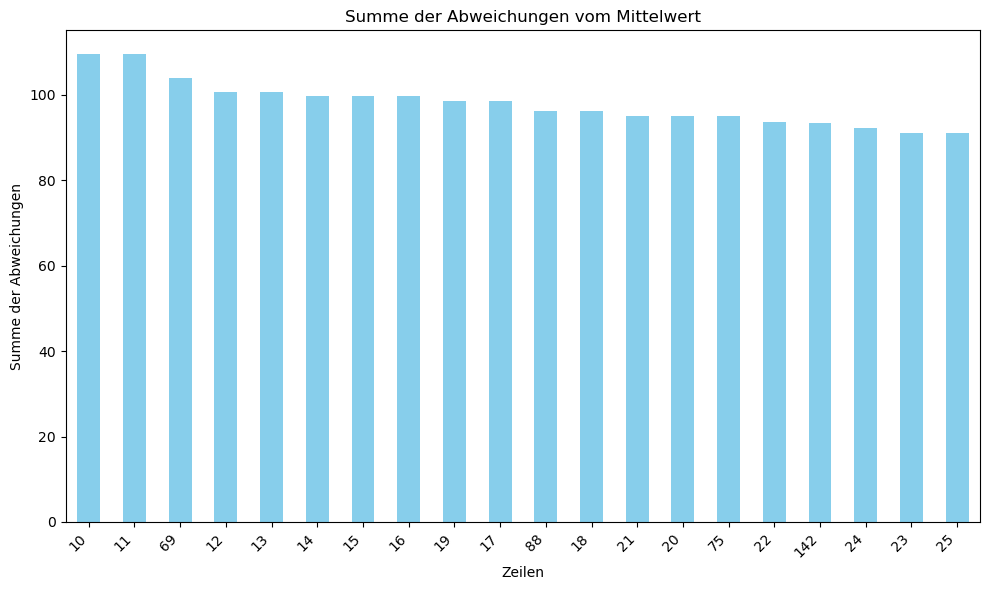

In [234]:
# Berechne für alle Zelle die Abwechung vom Mittelwert der Spalte df.mean() und speichere das Ergebnis in einer neuen DataFrame df_diff
df_diff = df - df.mean()
#print(df_diff.head())
# summiere den Betrag aller Abweichungen einer Zeile auf und speichere das Ergebnis in einer neuen Spalte df_diff['sum']
df_diff['sum'] = df_diff.abs().sum(axis=1)
#df_diff['sum'] = df_diff.sum(axis=1)
# sortiere die Zeilen nach der Summe der Abweichungen in aufsteigender Reihenfolge
df_diff = df_diff.sort_values(by='sum', ascending=False)
print (df_diff['sum'])
# plot the sum of the absolute differences
# plot only the first 20 rows

plt.figure(figsize=(10, 6))
df_diff['sum'].head(20).plot(kind='bar', color='skyblue')
plt.title('Summe der Abweichungen vom Mittelwert')
plt.xlabel('Zeilen')
plt.ylabel('Summe der Abweichungen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




# genauere Ausreißerbetrachtung

In einer genaueren Betrachtung wird jede Frage (Q1 bis Q54) durchlaufendie und die Abweichung der Antworten vom Mittelwert bertechnet. Wenn die Abweichung größer als das Zweifache der Standardabweichung ist, werden diese Antworten als Ausreißer betrachtet.

Tatsächlich enthaltne bestimmte Fragen im Datensatz Ausreißer. Dies deutet darauf hin, dass es Teilnehmer gab, die sich signifikant von der durchschnittlichen Antwort abheben. Zum Beispiel wurden in Frage 6, Frage 7 und Frage 43 Ausreißer identifiziert, wobei die Antworten dieser Teilnehmer deutlich von der üblichen Verteilung abwichen. Dies könnte darauf hinweisen, dass bestimmte Teilnehmer besonders extreme oder ungewöhnliche Meinungen zu den entsprechenden Fragen hatten, was möglicherweise die Aussagekraft der Fragen bzw. der Features beeinträchtigt.

Zwar fällt, wie eben erkannt, keiner der Teilnehmer besonders auf, stattdessen gibt es einige auffällige Fragen. 

Im Folgenden soll demnach besonders bei diesen Fragen beachtet werden, wie stark die Korrelation mit Tennung de Paare ist. Zusätzlich wäre es interessant gerade diese Fragen zur Klassifizierung eines Vorhersage-Modells zu benutzen und die Leistung dessen zu evaluieren.  

In [235]:
import pandas as pd

outlier_data = []

for i in range(1, 55):
    q = df[f'Q{i}']
    outliers = q[(q - q.mean()).abs() > 2 * q.std()]
    if not outliers.empty:
        outliers_str = ', '.join(str(outlier) for outlier in outliers)
        outlier_data.append({'Frage': f'Q{i}', 'Ausreißer': outliers_str})

outlier_df = pd.DataFrame(outlier_data)
print(outlier_df)


  Frage                                       Ausreißer
0    Q6                                3, 3, 3, 4, 3, 4
1    Q7                       3, 4, 4, 4, 4, 3, 3, 3, 4
2   Q43  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
3   Q48                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0



# Korrelationsanalyse

Für die Korrelationsanalyse wird die Korrelation zwischen den verschiedenen Merkmalen im Datensatz betrachtet. Hierbei wird eine Heatmap verwendet, um die Korrelationsmatrix darzustellen. Die Werte werden farblich kodiert, wobei stärkere Korrelationen hervorgehoben werden.

Tatsächlich ist in der Korrelationsmatrix zu erkennen, dass die Fragen 6, 7 und 43, bei denen Ausreißer identifiziert wurden, tendenziell eine geringere Korrelation zu den anderen Fragen im Datensatz sowie zum Label 'Divorce' aufweisen.

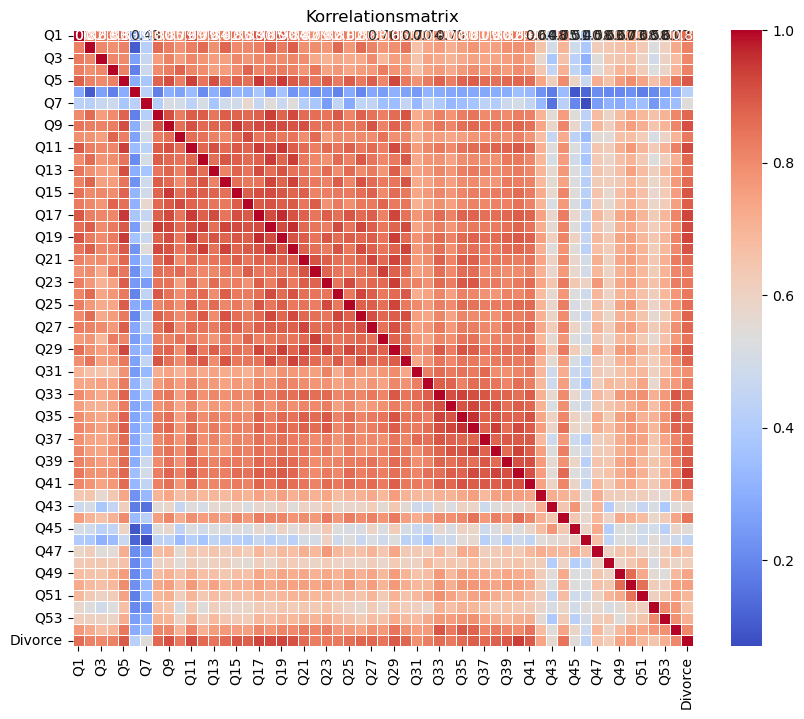

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korrelationsmatrix')
plt.show()


Um die Korrelation der Fragen mit dem Label 'Divorce' besser zu erkennen wird eine sortierte Liste erstellt. Die mit Ausreißern belasteten Fragen 6, 7 und 43 sind mit sehr niedriger Korrelation zu erkennen. 
Besonders Positiv fallen die Fragen 40, 17 und 19 auf. 

Aus der Korrelation mit dem Label 'Divorce' könnte bereits eine Feature-Selection abgeleitet werden. Die besonders mit 'Divorce' korrelierenden Fragen bzw. Features könnten als Basis für eine Klassifikation dienen.  

In [237]:
# correlation_with_divorce nach der Correlation sortieren
#  Q6, Q46, Q7  und Q45 haben die niedrigste Korrelation mit der Scheidung
# Wird das Modell schlecht wenn man mit diesen trainiert?
correlation_with_divorce = df.corr()['Divorce']
correlation_with_divorce = correlation_with_divorce.sort_values(ascending=True)

correlation_table = pd.DataFrame(correlation_with_divorce)
correlation_table.style.format('{:.2f}')





,Divorce
Q6,0.42
Q46,0.44
Q7,0.54
Q45,0.55
Q43,0.57
Q48,0.62
Q52,0.65
Q47,0.66
Q51,0.69
Q53,0.71


# Feature Importance 

## Decision Tree Classifier

Zur Feature Selection wird ein Decision tree Classifier auf den Datensatz angewendet. Dabei wird nicht in Test und Trainingsdaten aufgeteilt wie das zur Klassifizierung gemacht werden würde. Der Algorithmus teilt die Daten in drei Features, Q18, Q26 und Q40, das heißt der Baum hat die länge drei. Das Merkmal Q18 wird als besonders wichtig klassifiziert, dieses war bereits bei der Korrelationsanalyse positiv aufgefallen. Auch die Merkmale Q40 und Q26 sind weisen bei der Korrelationsanaylse mit dem Label 'Diovorce' eine hohe korrelation auf. Diese Ergebnisse scheinen demnach plausibel. Allderings ist die Auswahl von drei Features gering um damit eine Klassifikation durchzuführen. 

In [238]:
X = df.iloc[:, : -1]
y = df['Divorce']

clf1 = tree.DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=2)
clf1.fit(X, y)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [239]:
feature_importance = clf1.feature_importances_
feature_importance
#len(feature_importance)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.9317817 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04495612, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02326218,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [240]:
import numpy as np

# Erstelle ein Array von Indizes von 1 bis 54
indices = np.arange(1, 55)

# Sortiere die Indizes basierend auf der Wichtigkeit der Merkmale absteigend
sorted_indices = sorted(indices, key=lambda x: feature_importance[x-1], reverse=True)

# Dictionary, das die Indizes den Beschreibungen zuordnet
merkmale = {
    1: "If one of us apologizes when our discussion deteriorates, the discussion ends.",
    2: "I know we can ignore our differences, even if things get hard sometimes.",
    3: "When we need it, we can take our discussions with my spouse from the beginning and correct it.",
    4: "When I discuss with my spouse, to contact him will eventually work.",
    5: "The time I spent with my wife is special for us.",
    6: "We don't have time at home as partners.",
    7: "We are like two strangers who share the same environment at home rather than family.",
    8: "I enjoy our holidays with my wife.",
    9: "I enjoy traveling with my wife.",
    10: "Most of our goals are common to my spouse.",
    11: "I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.",
    12: "My spouse and I have similar values in terms of personal freedom.",
    13: "My spouse and I have similar sense of entertainment.",
    14: "Most of our goals for people (children, friends, etc.) are the same.",
    15: "Our dreams with my spouse are similar and harmonious.",
    16: "We're compatible with my spouse about what love should be.",
    17: "We share the same views about being happy in our life with my spouse.",
    18: "My spouse and I have similar ideas about how marriage should be.",
    19: "My spouse and I have similar ideas about how roles should be in marriage.",
    20: "My spouse and I have similar values in trust.",
    21: "I know exactly what my wife likes.",
    22: "I know how my spouse wants to be taken care of when she/he sick.",
    23: "I know my spouse's favorite food.",
    24: "I can tell you what kind of stress my spouse is facing in her/his life.",
    25: "I have knowledge of my spouse's inner world.",
    26: "I know my spouse's basic anxieties.",
    27: "I know what my spouse's current sources of stress are.",
    28: "I know my spouse's hopes and wishes.",
    29: "I know my spouse very well.",
    30: "I know my spouse's friends and their social relationships.",
    31: "I feel aggressive when I argue with my spouse.",
    32: "When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’.",
    33: "I can use negative statements about my spouse's personality during our discussions.",
    34: "I can use offensive expressions during our discussions.",
    35: "I can insult my spouse during our discussions.",
    36: "I can be humiliating when we discussions.",
    37: "My discussion with my spouse is not calm.",
    38: "I hate my spouse's way of open a subject.",
    39: "Our discussions often occur suddenly.",
    40: "We're just starting a discussion before I know what's going on.",
    41: "When I talk to my spouse about something, my calm suddenly breaks.",
    42: "When I argue with my spouse, ı only go out and I don't say a word.",
    43: "I mostly stay silent to calm the environment a little bit.",
    44: "Sometimes I think it's good for me to leave home for a while.",
    45: "I'd rather stay silent than discuss with my spouse.",
    46: "Even if I'm right in the discussion, I stay silent to hurt my spouse.",
    47: "When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.",
    48: "I feel right in our discussions.",
    49: "I have nothing to do with what I've been accused of.",
    50: "I'm not actually the one who's guilty about what I'm accused of.",
    51: "I'm not the one who's wrong about problems at home.",
    52: "I wouldn't hesitate to tell my spouse about her/his inadequacy.",
    53: "When I discuss, I remind my spouse of her/his inadequacy.",
    54: "I'm not afraid to tell my spouse about her/his incompetence."
}


# Zeige die sortierten Merkmale mit ihren Beschreibungen an
for i in sorted_indices:
    print("Importance: ", feature_importance[i-1], "  Merkmal", i, ":", merkmale[i])


Importance:  0.9317817014446228   Merkmal 18 : My spouse and I have similar ideas about how marriage should be.
Importance:  0.04495612012078505   Merkmal 26 : I know my spouse's basic anxieties.
Importance:  0.023262178434592173   Merkmal 40 : We're just starting a discussion before I know what's going on.
Importance:  0.0   Merkmal 1 : If one of us apologizes when our discussion deteriorates, the discussion ends.
Importance:  0.0   Merkmal 2 : I know we can ignore our differences, even if things get hard sometimes.
Importance:  0.0   Merkmal 3 : When we need it, we can take our discussions with my spouse from the beginning and correct it.
Importance:  0.0   Merkmal 4 : When I discuss with my spouse, to contact him will eventually work.
Importance:  0.0   Merkmal 5 : The time I spent with my wife is special for us.
Importance:  0.0   Merkmal 6 : We don't have time at home as partners.
Importance:  0.0   Merkmal 7 : We are like two strangers who share the same environment at home rathe

# Feature Importance - Random Forest Classifier

Weil bei der Feature Selection mit dem Decision Tree Classifier nur drei wichtige Features erkannt wruden, wird zusätzlich ein Random Forest Classifier zur angewandt. Die Fragen werden nach Relevanz sortiert. Wieder sind Fragen Q18, Q26 und Q40 Favoriten, aber die Relevanz ist deutlcih stärker verteilt. Mit zehn der wichtigsten Features soll nun ein Classifier trainiert werden. 

In [241]:
from sklearn.ensemble import RandomForestClassifier

# Ein Random Forest mit 100 Bäumen und anderen Standardparametern erstellen
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)


RandomForestClassifier(random_state=42)

In [242]:
import numpy as np

feature_importance_rf = rf_clf.feature_importances_

# Erstelle ein Array von Indizes von 1 bis 54
indices = np.arange(1, 55)

# Sortiere die Indizes basierend auf der Wichtigkeit der Merkmale absteigend
sorted_indices = sorted(indices, key=lambda x: feature_importance_rf[x-1], reverse=True)


# Zeige die sortierten Merkmale mit ihren Beschreibungen an
for i in sorted_indices:
    print( "  Merkmal", i, ":", merkmale[i],"Importance: ", feature_importance_rf[i-1])

  Merkmal 18 : My spouse and I have similar ideas about how marriage should be. Importance:  0.13592356611894443
  Merkmal 40 : We're just starting a discussion before I know what's going on. Importance:  0.114338171992903
  Merkmal 11 : I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other. Importance:  0.09590573757078627
  Merkmal 20 : My spouse and I have similar values in trust. Importance:  0.07614818618137914
  Merkmal 26 : I know my spouse's basic anxieties. Importance:  0.06905668536845697
  Merkmal 17 : We share the same views about being happy in our life with my spouse. Importance:  0.06839241555151182
  Merkmal 19 : My spouse and I have similar ideas about how roles should be in marriage. Importance:  0.05739309678719063
  Merkmal 16 : We're compatible with my spouse about what love should be. Importance:  0.03757304869779308
  Merkmal 25 : I have knowledge of my spouse's inner world. Importance:  0.0367101515

# Random Forest neu


Der Random Forest Klassifikator erreicht eine Genauigkeit (Accuracy) von 97.06%. Dies bedeutet, dass das Modell in etwa 97.06% der Fälle die richtige Vorhersage trifft.

Die Precision beträgt 1.0, was darauf hinweist, dass das Modell in den Fällen, in denen es die positive Klasse vorhersagt, immer korrekt ist. Mit anderen Worten, es gibt keine falsch positiven Vorhersagen.

Der Recall beträgt 0.95, was bedeutet, dass das Modell in etwa 95% der Fälle die tatsächlich positive Klasse korrekt erkennt. Mit anderen Worten, es verpasst etwa 5% der tatsächlich positiven Fälle.

Der F1-Score beträgt 0.974, was eine harmonische Mittelwert der Precision und Recall ist. Ein hoher F1-Score deutet darauf hin, dass das Modell sowohl eine hohe Precision als auch einen hohen Recall erreicht hat, was auf eine gute Balance zwischen Precision und Recall hinweist.

Insgesamt scheint der Random Forest Klassifikator sehr gut zu funktionieren, da er eine hohe Genauigkeit und einen hohen F1-Score aufweist, was darauf hindeutet, dass er sowohl präzise als auch robust in der Vorhersage ist.

In [243]:
#  Random forest classifier

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Daten einlesen
file_path = "data/divorce_data.csv"
df = pd.read_csv(file_path, delimiter=";")

# Features und Zielvariable auswählen

X = df[['Q18', 'Q40', 'Q11', 'Q20', 'Q26', 'Q17', 'Q19', 'Q16', 'Q25', 'Q9']]
#X = df[['Q18']]
#X = df[['Q30']]
#X = df[['Q6']]


y = df['Divorce']  # Zielvariable

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Klassifikator erstellen und trainieren
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred = rf_classifier.predict(X_test)

# Genauigkeit des Modells auswerten
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Berechnen von Precision, Recall und F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Ausgabe der Ergebnisse
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9705882352941176
Precision: 1.0
Recall: 0.95
F1-Score: 0.9743589743589743


Das Modell wird auch einmal auf den Trainingdaten trainiert:

In [244]:
# Genauigkeit auf den Trainingsdaten auswerten

# Vorhersagen auf dem Trainingsset machen
y_pred_train = rf_classifier.predict(X_train)

# Genauigkeit des Modells auf den Trainingsdaten auswerten
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training data:", accuracy_train)


Accuracy on training data: 1.0



Die Beobachtung, dass das Modell eine hohe Genauigkeit auf den Trainingsdaten aufweist, könnte darauf hinweisen, dass das Modell die Trainingsdaten quasi auswendig gelernt hat. Dies wird oft als Overfitting bezeichnet, bei dem das Modell die Rauschdaten in den Trainingsdaten statt der zugrunde liegenden Muster und Zusammenhänge lernt. In solchen Fällen kann das Modell Schwierigkeiten haben, auf neuen Daten gut zu generalisieren.

Jedoch ist es in diesem Fall interessant festzustellen, dass die Genauigkeit auf den Testdaten ebenfalls hoch ist. Dies deutet darauf hin, dass das Modell trotz der hohen Genauigkeit auf den Trainingsdaten auch auf neuen, nicht gesehenen Daten gut abschneidet. Wenn das Modell sowohl auf den Trainings- als auch auf den Testdaten hohe Genauigkeiten aufweist, deutet dies darauf hin, dass das Modell tatsächlich die zugrunde liegenden Muster und Zusammenhänge in den Daten erfasst hat, anstatt nur die Trainingsdaten auswendig zu lernen.

# Training mit anderen Classifiern

um zu die Leistung verschiedener Classivier auf den Daten zu testen, wird nun noch die Classifizierung mit SVC und eine Logistische Regression durchgeführt. 

## Support Vector Classifier

In [245]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Daten einlesen
file_path = "data/divorce_data.csv"
df = pd.read_csv(file_path, delimiter=";")

# Features und Zielvariable auswählen
X = df[['Q18', 'Q40', 'Q11', 'Q20', 'Q26', 'Q17', 'Q19', 'Q16', 'Q25', 'Q9']]
#X = df[['Q18']]
#X = df[['Q30']]
#X = df[['Q6']]

y = df['Divorce']  # Zielvariable

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVC Klassifikator erstellen und trainieren
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred = svc_classifier.predict(X_test)

# Genauigkeit des Modells auswerten
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Berechnen von Precision, Recall und F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Ausgabe der Ergebnisse
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


# Logistic Regression

In [246]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Daten einlesen
file_path = "data/divorce_data.csv"
df = pd.read_csv(file_path, delimiter=";")

# Features und Zielvariable auswählen
X = df[['Q18', 'Q40', 'Q11', 'Q20', 'Q26', 'Q17', 'Q19', 'Q16', 'Q25', 'Q9']]
#X = df[['Q18']]
#X = df[['Q30']]
#X = df[['Q6']]

y = df['Divorce']  # Zielvariable

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistisches Regressionsmodell erstellen und trainieren
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred = logistic_regression.predict(X_test)

# Genauigkeit des Modells auswerten
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Berechnen von Precision, Recall und F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Ausgabe der Ergebnisse
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


## Fazit zu den Classifiern 


SVC und logistische Regression erreichen eine Genauigkeit von 1.0 auf den Testdaten, was bedeutet, dass keine einzige Person falsch klassifiziert wurde. Selbst wenn nur das als wichtigstes Merkmal identifizierte Merkmal, Frage Q18, zur Schulung verwendet wird, erzielen SVC und logistische Regression immer noch eine Genauigkeit von 1.0. Nur bei der Verwendung weniger guter Fragen kann ein Unterschied festgestellt werden. Diese können im Code aktiviert werden, um sie zu testen. Frage Q6, die bereits bei der Korrelationsanalyse negativ aufgefallen ist, liefert ein schlechtes Ergebnis. Die beiden Klassifizierer sind sogar besser als der Random Forest Classifier, was ein Erfolg ist, insbesondere im Vergleich zum Dummy-Klassifizierer, der eine Genauigkeit von etwa 50% erreicht. Allerdings lässt dies wenig Raum für Verbesserungen. Das Hyperparameter-Tuning wird auch für den Random Forest Classifier angewendet, da hier noch etwas Verbesserungspotenzial besteht.

# dummy 

In [247]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dummy Classifier erstellen
dummy_classifier = DummyClassifier(strategy="most_frequent")  # Dummy Classifier, der die häufigste Klasse vorhersagt

# Modell trainieren
dummy_classifier.fit(X_train, y_train)

# Vorhersagen machen
dummy_predictions = dummy_classifier.predict(X_test)

# Bewertung des Modells
accuracy = accuracy_score(y_test, dummy_predictions)
precision = precision_score(y_test, dummy_predictions)
recall = recall_score(y_test, dummy_predictions)
f1 = f1_score(y_test, dummy_predictions)

print("Genauigkeit des Dummy Classifiers:", accuracy)
print("Precision des Dummy Classifiers:", precision)
print("Recall des Dummy Classifiers:", recall)
print("F1-Score des Dummy Classifiers:", f1)


Genauigkeit des Dummy Classifiers: 0.4117647058823529
Precision des Dummy Classifiers: 0.0
Recall des Dummy Classifiers: 0.0
F1-Score des Dummy Classifiers: 0.0


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Da die Daten ungefähr gleichmäßig zwischen "Scheidung" und "Keine Scheidung" aufgeteilt sind, erzielt der Dummy-Classifier nur eine Genauigkeit von etwa 50%.

## Hyperparametertuning

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definieren des Parameterrasters für das Hyperparametertuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['sqrt', 'log2']
}
# Auskommentiert, dasmit es schneller läuft

# Random Forest Klassifikator erstellen
rf_classifier = RandomForestClassifier(random_state=0)

# Grid-Suche durchführen
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Beste Parameter ausgeben
best_params = grid_search.best_params_
print("Beste Parameter:", best_params)


Beste Parameter: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


# Random Forest mit hyperparametertuning 

In [249]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Daten einlesen
file_path = "data/divorce_data.csv"
df = pd.read_csv(file_path, delimiter=";")

# Features und Zielvariable auswählen


X = df[['Q18', 'Q40', 'Q11', 'Q20', 'Q26', 'Q17', 'Q19', 'Q16', 'Q25', 'Q9']]
X = df[['Q30']]


y = df['Divorce']  # Zielvariable

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Klassifikator erstellen und trainieren
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=3, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)
rf_classifier.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred = rf_classifier.predict(X_test)

# Genauigkeit des Modells auswerten
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9411764705882353



Das Hyperparameter-Tuning verbessert leider nicht den Random Forest. Der Grund dafür liegt in der bereits unglaublich guten Genauigkeit, die wenig Spielraum für Verbesserungen lässt. Dies führt dazu, dass sich das Ergebnis des Classifiers nicht ändert, es sei denn, es werden grundlegende Änderungen an den Hyperparametern vorgenommen.

## Lineare Classifizierung


Die guten Ergebnisse der Classifier legen nahe, dass die Fragen gut gestellt sind und es daher leicht ist, zwischen den Zuständen "getrennt" und "vergeben" zu unterscheiden. Selbst mit einzelnen Features lässt sich das Modell gut trainieren. Da die Fragen auf einer Skala von 0 bis 4 bewertet wurden, stellt sich die Frage, ob eine einfache lineare Klassifizierung durchgeführt werden kann. Dazu sollen die drei bereits häufig betrachteten Features Q18, Q30 und Q6 genauer analysiert werden.

Die visuelle Darstellung zeigt die Verteilung der Antworten auf Frage Q30 basierend auf dem Beziehungsstatus. Die roten Punkte repräsentieren verheiratete Personen, während die blauen Punkte für getrennt lebende Personen stehen. Jeder Punkt entspricht einer Antwort auf Frage Q30 und liegt auf der Skala von 0 bis 4. Die Position entlang der x-Achse repräsentiert die Reihenfolge der Antworten, während der Wert auf der y-Achse den spezifischen Wert von Q30 für jede Antwort angibt. Die Unterschiede in der Verteilung der Antworten zwischen den beiden Beziehungsstatusgruppen können anhand der Farben der Punkte visuell erkannt werden.

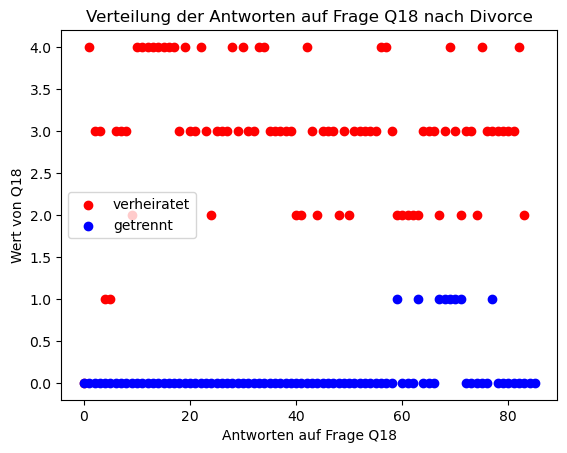

In [250]:
import matplotlib.pyplot as plt

# Filtern der Daten, um nur die Zeilen zu behalten, bei denen Divorce gleich 1 ist
divorce_1_data = df[df['Divorce'] == 1]

# Filtern der Daten, um nur die Zeilen zu behalten, bei denen Divorce gleich 0 ist
divorce_0_data = df[df['Divorce'] == 0]

# Extrahieren der Antworten auf Q18 für diese Daten
q18_responses_divorce_1 = divorce_1_data['Q18']
q18_responses_divorce_0 = divorce_0_data['Q18']

# Frage 18: We don't have time at home as partners.

# Erstellen einer Liste von Indizes für die x-Achse (von 0 bis n-1 für n Antworten)
x_values_divorce_1 = range(len(q18_responses_divorce_1))
x_values_divorce_0 = range(len(q18_responses_divorce_0))

# Erstellen des Plots mit Streupunkten
plt.scatter(x_values_divorce_1, q18_responses_divorce_1, color='red', label='verheiratet')
plt.scatter(x_values_divorce_0, q18_responses_divorce_0, color='blue', label='getrennt')

# Beschriftungen der Achsen
plt.xlabel('Antworten auf Frage Q18')
plt.ylabel('Wert von Q18')
plt.title('Verteilung der Antworten auf Frage Q18 nach Divorce')

# Hinzufügen einer Legende
plt.legend()

# Anzeigen des Plots
plt.show()


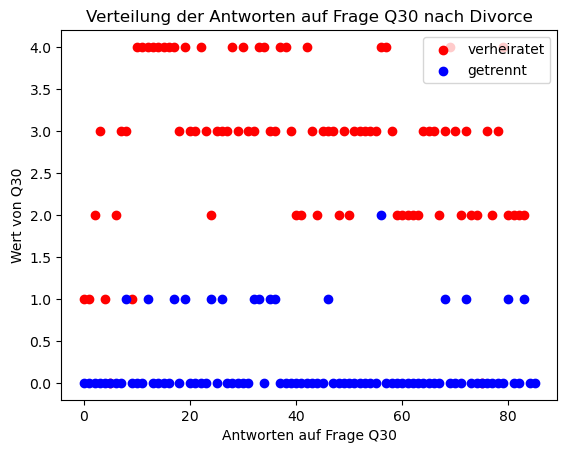

In [251]:
import matplotlib.pyplot as plt

# Filtern der Daten, um nur die Zeilen zu behalten, bei denen Divorce gleich 1 ist
divorce_1_data = df[df['Divorce'] == 1]

# Filtern der Daten, um nur die Zeilen zu behalten, bei denen Divorce gleich 0 ist
divorce_0_data = df[df['Divorce'] == 0]

# Extrahieren der Antworten auf Q30 für diese Daten
q30_responses_divorce_1 = divorce_1_data['Q30']
q30_responses_divorce_0 = divorce_0_data['Q30']

# Frage 30: I know my spouse's friends and their social relationships.

# Erstellen einer Liste von Indizes für die x-Achse (von 0 bis n-1 für n Antworten)
x_values_divorce_1 = range(len(q30_responses_divorce_1))
x_values_divorce_0 = range(len(q30_responses_divorce_0))

# Erstellen des Plots mit Streupunkten
plt.scatter(x_values_divorce_1, q30_responses_divorce_1, color='red', label='verheiratet')
plt.scatter(x_values_divorce_0, q30_responses_divorce_0, color='blue', label='getrennt')

# Beschriftungen der Achsen
plt.xlabel('Antworten auf Frage Q30')
plt.ylabel('Wert von Q30')
plt.title('Verteilung der Antworten auf Frage Q30 nach Divorce')

# Hinzufügen einer Legende
plt.legend()

# Anzeigen des Plots
plt.show()

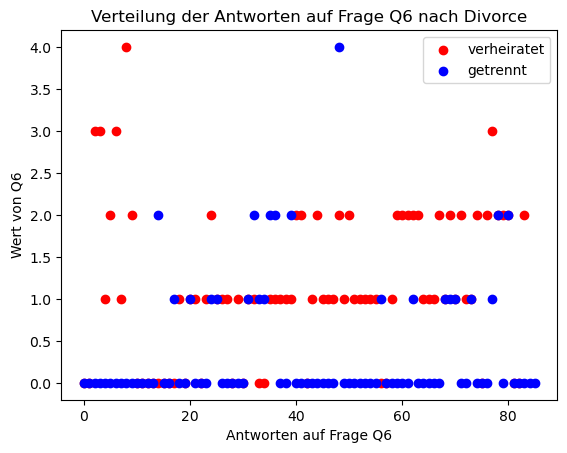

In [252]:
import matplotlib.pyplot as plt

# Filtern der Daten, um nur die Zeilen zu behalten, bei denen Divorce gleich 1 ist
divorce_1_data = df[df['Divorce'] == 1]

# Filtern der Daten, um nur die Zeilen zu behalten, bei denen Divorce gleich 0 ist
divorce_0_data = df[df['Divorce'] == 0]

# Extrahieren der Antworten auf Q6 für diese Daten
q6_responses_divorce_1 = divorce_1_data['Q6']
q6_responses_divorce_0 = divorce_0_data['Q6']

# Frage 6: We're compatible with my spouse about what love should be.

# Erstellen einer Liste von Indizes für die x-Achse (von 0 bis n-1 für n Antworten)
x_values_divorce_1 = range(len(q6_responses_divorce_1))
x_values_divorce_0 = range(len(q6_responses_divorce_0))

# Erstellen des Plots mit Streupunkten
plt.scatter(x_values_divorce_1, q6_responses_divorce_1, color='red', label='verheiratet')
plt.scatter(x_values_divorce_0, q6_responses_divorce_0, color='blue', label='getrennt')

# Beschriftungen der Achsen
plt.xlabel('Antworten auf Frage Q6')
plt.ylabel('Wert von Q6')
plt.title('Verteilung der Antworten auf Frage Q6 nach Divorce')

# Hinzufügen einer Legende
plt.legend()

# Anzeigen des Plots
plt.show()


Für die Fragen 18 und 30 ist eine klare Trennung zu erkennen, die stark mit dem Divorce-Label korreliert ist. Bei Frage 6 hingegen ist diese Trennung weniger deutlich erkennbar.

## Linearer Classifier bei 2.0

Nun wird die Zielvariable basierend auf der Bedingung, dass die Antwort größer oder gleich 2 ist, definiert. Anschließend berechnet er die Genauigkeit des Modells, das auf diese spezifische Frage trainiert wurde.

In [253]:
# Definieren der Zielvariable basierend auf der Bedingung
df['Predicted_Divorce'] = (df['Q18'] >= 2).astype(int)

# Berechnen der Genauigkeit
accuracy = (df['Predicted_Divorce'] == df['Divorce']).mean()
print("frage 18|Most of our goals are common to my spouse.")
print("Genauigkeit des Modells bei Training mit Frage 18:", accuracy)

# Definieren der Zielvariable basierend auf der Bedingung
df['Predicted_Divorce'] = (df['Q30'] >= 2).astype(int)

# Berechnen der Genauigkeit
accuracy = (df['Predicted_Divorce'] == df['Divorce']).mean()
print("frage 30|I know my spouse's friends and their social relationships.")
print("Genauigkeit des Modells bei Training mit Frage 30:", accuracy)

# Definieren der Zielvariable basierend auf der Bedingung
df['Predicted_Divorce'] = (df['Q6'] >= 2).astype(int)

# Berechnen der Genauigkeit
accuracy = (df['Predicted_Divorce'] == df['Divorce']).mean()
print("frage 6|We don't have time at home as partners.")
print("Genauigkeit des Modells bei Training mit Frage 6: ", accuracy)








frage 18|Most of our goals are common to my spouse.
Genauigkeit des Modells bei Training mit Frage 18: 0.9823529411764705
frage 30|I know my spouse's friends and their social relationships.
Genauigkeit des Modells bei Training mit Frage 30: 0.9588235294117647
frage 6|We don't have time at home as partners.
Genauigkeit des Modells bei Training mit Frage 6:  0.6176470588235294


Die Modelle, die auf die Fragen 18, 30 und 6 trainiert wurden, erzielen Genauigkeiten von etwa 98.2%, 95.9% bzw. 61.8%. Die lineare Klassifizierung ist relativ erfolgreich, besonders, wenn berechente Genauigkeit des Dummy-Classifiers von etwa 50% betrachtet wird. 

## Linearer Classifier bei 1.0

Testweise soll die Tennung bei 1.0 statt 2.0 passieren. 

In [254]:
# Definieren der Zielvariable basierend auf der Bedingung
df['Predicted_Divorce'] = (df['Q18'] >= 1).astype(int)

# Berechnen der Genauigkeit
accuracy = (df['Predicted_Divorce'] == df['Divorce']).mean()
print("frage 18|Most of our goals are common to my spouse.")
print("Genauigkeit des Modells bei Training mit Frage 18:", accuracy)

# Definieren der Zielvariable basierend auf der Bedingung
df['Predicted_Divorce'] = (df['Q30'] >= 1).astype(int)

# Berechnen der Genauigkeit
accuracy = (df['Predicted_Divorce'] == df['Divorce']).mean()
print("frage 30|I know my spouse's friends and their social relationships.")
print("Genauigkeit des Modells bei Training mit Frage 30:", accuracy)

# Definieren der Zielvariable basierend auf der Bedingung
df['Predicted_Divorce'] = (df['Q6'] >= 1).astype(int)

# Berechnen der Genauigkeit
accuracy = (df['Predicted_Divorce'] == df['Divorce']).mean()
print("frage 6|We don't have time at home as partners.")
print("Genauigkeit des Modells bei Training mit Frage 6: ", accuracy)

frage 18|Most of our goals are common to my spouse.
Genauigkeit des Modells bei Training mit Frage 18: 0.9470588235294117
frage 30|I know my spouse's friends and their social relationships.
Genauigkeit des Modells bei Training mit Frage 30: 0.8941176470588236
frage 6|We don't have time at home as partners.
Genauigkeit des Modells bei Training mit Frage 6:  0.7411764705882353


Während sich die Genauigkeit bei den Fragen 18 und 30 verschlechtert, wenn die Trennung bei 1.0 gesetzt wird, verbessert sich diese detlich bei Frage 6. 

# Fazit
Viele der Fragen des Interviews wurden offensichtilich sehr gut gestellt, so dass sich leicht vorhersagen lässt, ob es zu Trennung kommt. Zusätzlich ist die Anzahl der Daten relativ gering. Dies macht es schwierig die verschiedenen Classifier miteinander zu vergleichen, da die Unterschiede wegen der hohen Leistung sehr gering sind. Hyperparametertuning und die Verwendung von komplexeren Modellen zur Vorhersage sind demnach obsolet. Allerdings ermöglicht es die genaue Betrachtung einzelner Fragen. Besonders interessant ist, dass mit einer einfachen linearen Klassifizierung bereits ein gutes Ergebnis erreicht werden kann. Es hat sich herausgestellt, dass bei einem wenig komplexen Sachverhalt auch einfachere Klassifizierungsmethoden hilfreich sein können. 